# Picard iteration tutorial

The **Picard iteration** is often used to prove the existence and uniqueness of the solution to ODEs where the dynamics are Lipschitz continuous. We won't go into the theory here but rather merely illustrate the technique graphically.

We will use the following Julia packages:

In [1]:
using ApproxFun, LinearAlgebra, Plots, LaTeXStrings

The simple ODE we want to solve is

$$
\begin{aligned}
\frac{\text{d}y}{\text{d}x} &= f(y) = 2(y+1)\\
y(x_0) &= y_0 = 0.
\end{aligned}
$$

In [2]:
f(y) = 2(y+1)

f (generic function with 1 method)

In order to solve the ODE using function approximations of the solution $y:X \to Y$, we need to first define the domain $X$, which we will set as $X := [x_0,x_f] = [0,2]$.

In [3]:
x0,xf = BigFloat.((0,2))
X = x0..xf

0.0..2.0

The Picard iteration algorithm starts with a guess, e.g., the constant function $y_1(x) = y_0$.

In [4]:
y0 = 0
y1 = Fun(x->y0,X)

Fun(Chebyshev(0.0..2.0),[0.0])

From there, we build subsequently better approximations:

$$
y_n(x) = y_0 + \int_{x_0}^{x} \text{d}\xi\, f(y_{n-1}(\xi)).
$$

In [5]:
N = 50
Y = []
yn = y1
push!(Y,yn)
for n ∈ 2:N
    yn = y0 + cumsum(f(yn))
    push!(Y,yn)
end

Let's plot the first 20 iterations and note that the appoximations seems to converge to a function, which we hope is the solution.

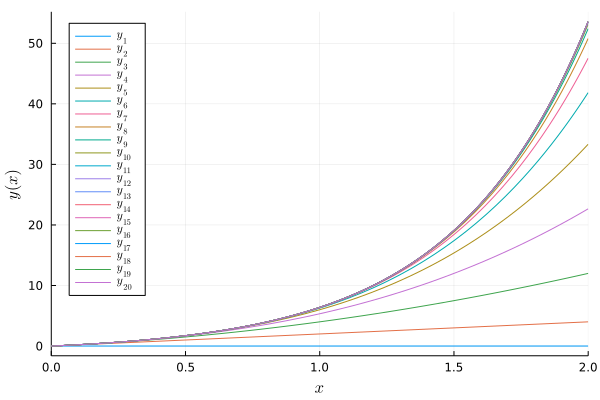

In [6]:
fig1 = plot(xlims=(x0,xf),xlabel=L"x",ylabel=L"y(x)",legend=:topleft,fmt=:png)
for (n,yn) in enumerate(Y[1:20])
    fig1 = plot!(yn,label=L"y_{%$n}")
end
display(fig1)

While we can easily check the results against the [exact solution](https://users.math.msu.edu/users/seal/teaching/f09/picard_iteration.pdf) $y(x) = e^{2x}-1$, we can also quickly illustrate a numerical "functional analytic" method to solve the linear ODE

$$
\begin{aligned}
Ly &= 2\\
y(x_0) &= y_0
\end{aligned}
$$

by "inverting" the linear operator $L := D-2I$, where $D$ and $I$ are the differential and identity operators. To use `ApproxFun`, we must also encode the initial condition as a left boundary condition operator $B$ to solve the system $\mathcal{L}y = b$, where $\mathcal{L} := [L\ B]^T$ and $b := [2\ y_0]^T$. We can solve for the solution as a generalized vector with the backslash (`\`) operation that we're familiar with from linear algebra.

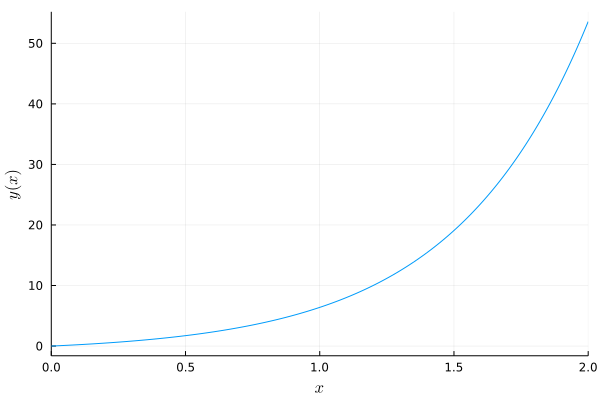

In [7]:
L = 𝒟 - 2
B = ldirichlet(X)
ℒ = [L;B]
b = [2;y0]
y = ℒ\b
fig2 = plot(y,xlims=(x0,xf),xlabel=L"x",ylabel=L"y(x)",legend=false,fmt=:png)
display(fig2)

It is pretty clear by eye that the Picard iteration seems converge to the solution. To see this more clearly, let's plot the error $\lVert y_n-y \rVert_2$:

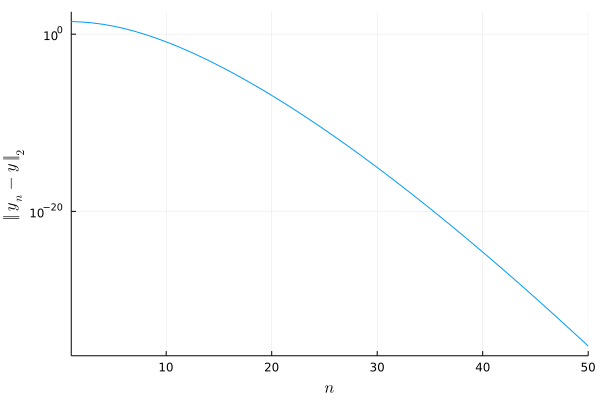

In [8]:
fig3 = plot(norm.(Y.-y),xlims=(1,N),yscale=:log10,xlabel=L"n",ylabel=L"\Vert y_n-y\ \Vert_2",legend=false,fmt=:png)
display(fig3)